## **9주차 회귀분석 심화 강의 코드**

### 목차

- 일반화 선형 모형 (GLM)
    - 일반화 선형모형 소개 
    - 링크함수 소개 
    - 이항 데이터 (로지스틱) 
    - 이산형 데이터 (포아송) 

- 정규화 회귀분석 
    
    - 정규화란? (Regularization, Penalty) 
    - Ridge, Lasso, Elastic 회귀 모형
    - 정규화 회귀의 장점 변수선택

- 비선형 모형 (Non-Linear) 
    - 비선형 모형의 필요성 (선형 모형의 한계)
    - 스플라인 회귀 (Spline)  
    - 기계학습으로의 확장 

- 실제 데이터 분석 하기 



In [24]:
import warnings

# 워닝 메시지 필터링
warnings.filterwarnings("ignore")


--- 
### **링크함수 소개**


- Identity 링크

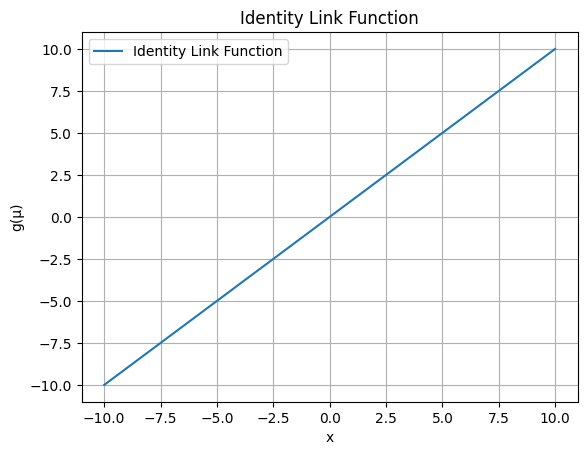

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100)
y = x

plt.plot(x, y, label="Identity Link Function")
plt.xlabel("x")
plt.ylabel("g(µ)")
plt.title("Identity Link Function")
plt.legend()
plt.grid(True)
plt.show()

- Logit 링크

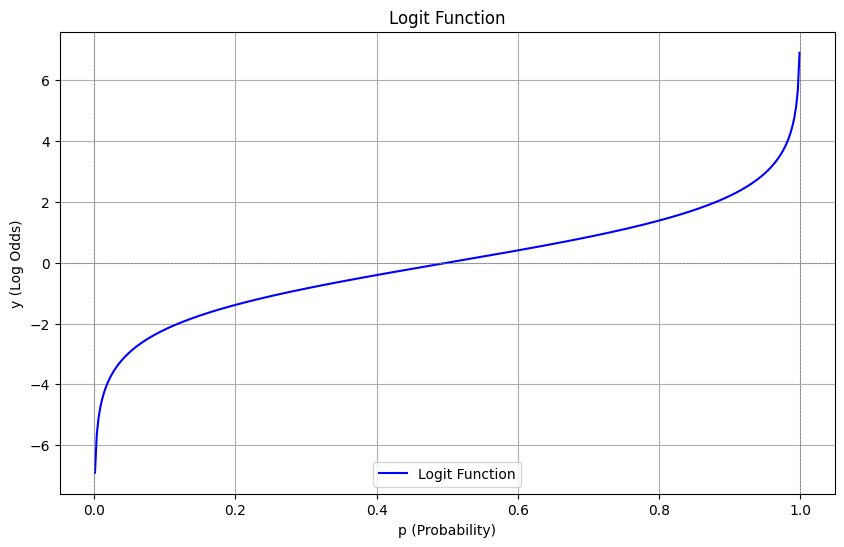

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# p는 0에 가깝게부터 1에 가깝게까지의 범위로 설정
p = np.linspace(0.001, 0.999, 400)

# 로짓 함수 계산
logit = np.log(p / (1 - p))

plt.figure(figsize=(10, 6))

# 그래프 그리기
plt.plot(p, logit, label="Logit Function", color='blue')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(1, color='grey', linestyle='--', linewidth=0.5)
plt.xlabel("p (Probability)")
plt.ylabel("y (Log Odds)")
plt.title("Logit Function")
plt.legend()
plt.grid(True)
plt.show()

- log 링크

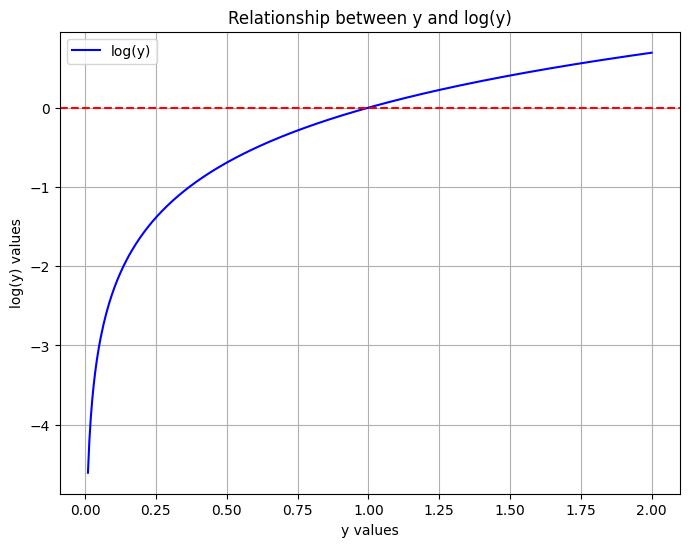

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# y 값을 0에서 2까지의 범위로 설정
y_values = np.linspace(0.01, 2, 400) # 0에 가까운 값부터 시작해서 log(0)의 정의되지 않는 문제를 방지
log_y_values = np.log(y_values)

plt.figure(figsize=(8, 6))
plt.plot(y_values, log_y_values, label='log(y)', color='blue')
plt.axhline(0, color='red', linestyle='--')  # y=0 선
plt.xlabel('y values')
plt.ylabel('log(y) values')
plt.title('Relationship between y and log(y)')
plt.legend()
plt.grid(True)
plt.show()

--- 
### **일반화 선형모형(GLM)**


- 로지스틱

In [12]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# 가상의 데이터 생성
np.random.seed(123)
n = 100
x1 = np.random.randn(n)
x2 = np.random.randn(n)
y_continuous = 1 + 2*x1 + 3*x2 + np.random.randn(n)
y = (y_continuous > 0.6).astype(int)

# 데이터프레임으로 변환
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
data

,x1,x2,y
0,-1.085631,0.642055,1
1,0.997345,-1.977888,0
2,0.282978,0.712265,1
3,-1.506295,2.598304,1
4,-0.578600,-0.024626,0
...,...,...,...
95,1.031114,-3.231055,0
96,-1.084568,-0.269293,0
97,-1.363472,-0.110851,0
98,0.379401,-0.341262,1


In [13]:
# 로지스틱 회귀모형 적합
X = sm.add_constant(data[['x1', 'x2']])
model = sm.GLM(data['y'], X, family=sm.families.Binomial())
result = model.fit()

# 결과 출력
print(result.summary())

# 잔차 검정
print("\nResiduals:")
print(result.resid_deviance.head())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17.165
Date:                Fri, 27 Oct 2023   Deviance:                       34.331
Time:                        13:03:15   Pearson chi2:                     40.2
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6453
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8742      0.492      1.777      0.0

- 포아송 GLM

In [16]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 데이터 생성
np.random.seed(123)  # 재현성을 위한 시드 설정

n_samples = 1000
X = np.linspace(0, 10, n_samples)
# 실제 모델: log(기대값) = intercept + coef * X
intercept = 1.0
coef = 0.3

# 포아송 분포에서 랜덤하게 샘플 추출
y = np.random.poisson(np.exp(intercept + coef * X))

# 데이터프레임 형태로 변환
data = pd.DataFrame({"X": X, "y": y})

data


,X,y
0,0.00000,2
1,0.01001,5
2,0.02002,3
3,0.03003,0
4,0.04004,2
...,...,...
995,9.95996,47
996,9.96997,46
997,9.97998,57
998,9.98999,48


In [15]:
# 포아송 GLM 모델 적합
exog = sm.add_constant(data["X"])  # 상수항 추가
poisson_model = sm.GLM(data["y"], exog, family=sm.families.Poisson())
result = poisson_model.fit()

# 결과 출력
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.7
Date:                Fri, 27 Oct 2023   Deviance:                       1009.8
Time:                        13:07:54   Pearson chi2:                     971.
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9866      0.024     40.374      0.0

--- 
### **정규화 회귀모형**



- 라쏘

In [22]:
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import make_regression

# 데이터 생성
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# statsmodels를 위한 상수항 추가
X_const = sm.add_constant(X)

pd.DataFrame(X_const)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.225842,1.551378,-0.107347,0.859695,-0.942963,-1.096625,-1.197167,-1.733767,-0.950042,...,1.672990,1.477373,0.335126,-0.621135,-1.525106,1.011097,1.478184,-1.351547,0.364602,0.133166
1,1.0,0.110836,-1.454615,0.263888,-1.654510,0.818549,0.482849,0.358334,-0.061366,0.327626,...,-2.128649,-0.546838,2.679629,-1.851587,0.872090,-0.987858,1.744496,-1.426464,-0.604514,-0.166242
2,1.0,0.458600,-0.081280,-0.698474,0.737528,0.860085,0.275249,0.333945,-1.076817,0.947821,...,-0.379908,0.379610,1.508083,0.555380,-1.383018,-0.836187,0.606730,0.908223,0.511415,-2.093178
3,1.0,-1.795643,-0.453414,-0.423760,0.155325,0.487775,0.398147,0.732829,2.042178,0.733548,...,-1.274232,-0.734233,0.076609,1.048483,0.008784,-0.141530,-2.104750,-0.330090,-0.511764,-0.237683
4,1.0,-1.180626,0.339530,0.328010,-0.224555,0.963951,-1.058450,0.941256,0.968745,-0.002686,...,-0.589144,-1.049914,-1.078364,-0.494912,-0.518436,0.269235,-0.668149,-1.044086,0.482665,-0.579855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,1.726964,-0.372833,0.722381,1.024063,-1.760809,0.592527,0.224685,1.208366,2.558199,...,0.932591,-1.525656,1.542110,-1.418366,-0.564248,1.262584,2.061504,-0.399636,2.006093,0.184551
996,1.0,0.919229,-1.438278,0.113270,2.062525,1.281016,-1.067533,1.873298,0.423599,-0.846357,...,1.080048,0.067856,-0.334775,-0.447322,-0.643550,0.852774,-0.955123,-0.668144,-0.403648,1.029961
997,1.0,-0.512589,1.124777,0.898360,0.906544,-2.301472,0.072252,1.390255,0.064506,-0.187859,...,1.787346,-0.820879,-0.171674,-0.246335,1.118895,-0.426804,0.357661,0.683212,1.098485,1.274428
998,1.0,-2.968368,-0.929848,0.055208,1.366747,0.427677,0.313143,0.720224,0.733348,1.516288,...,0.520977,-0.704360,0.038916,-0.607323,-1.570237,0.204857,0.167003,1.349546,-0.489467,1.232284


In [25]:


# Lasso 회귀 적합 (statsmodels의 GLM 사용)
alpha = 0.5  # 정규화 파라미터
lasso_model = sm.GLM(y, X_const, family=sm.families.Gaussian(), link=sm.genmod.families.links.Identity())
lasso_results = lasso_model.fit_regularized(method='elastic_net', L1_wt=1, alpha=alpha, refit=True)

# 결과 출력
print(lasso_results.summary())

# 변수 선택 결과
coef = lasso_results.params
selected_features = np.where(coef != 0)[0]

print("\nSelected features:")
for index in selected_features:
    if index == 0:
        print("Intercept")
    else:
        print(f"Feature {index-1}")

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      990
Model Family:                Gaussian   Df Model:                           10
Link Function:               Identity   Scale:                        0.010377
Method:                   elastic_net   Log-Likelihood:                 870.15
Date:                Fri, 27 Oct 2023   Deviance:                       10.274
Time:                        13:23:26   Pearson chi2:                     10.3
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        n

--- 
### **비선형 회귀모형 소개**


- 다항 회귀(Poly Regression)

In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 생성 (2개의 설명변수)
X, y = make_regression(n_samples=1000, n_features=2, noise=0.1, random_state=42)

# 다항식으로 데이터 변환
poly_transformer = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly = poly_transformer.fit_transform(X)

# X1^2와 X1*X2 항 제거
X_poly = X_poly[:, [0, 1, 3]]  # X1, X2, X2^2 항만 선택

# 변수명 지정
column_names = ['X1', 'X2', 'X2^2']

# DataFrame으로 변환
X_df = pd.DataFrame(X_poly, columns=column_names)

# statsmodels를 위한 상수항 추가
X_poly_const = sm.add_constant(X_df)

# OLS 회귀 모델 적합
poly_model = sm.OLS(y, X_poly_const).fit()

# 결과 출력
print(poly_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.407e+07
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:30:58   Log-Likelihood:                 899.63
No. Observations:                1000   AIC:                            -1791.
Df Residuals:                     996   BIC:                            -1772.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.003      0.050      0.9

- 스무딩 스플라인 (Smoothing Spline)

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     14.3348
Link Function:                     IdentityLink Log Likelihood:                                 -1548.9948
Number of Samples:                         1000 AIC:                                             3128.6592
                                                AICc:                                            3129.1685
                                                GCV:                                                0.2455
                                                Scale:                                              0.2392
                                                Pseudo R-Squared:                                   0.6836
Feature Function                  Lam

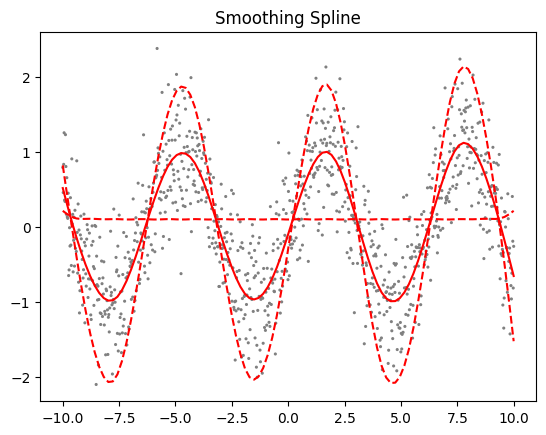

In [35]:
import numpy as np
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# 간단한 비선형 데이터 생성
np.random.seed(42)
X = np.linspace(-10, 10, 1000)
y = np.sin(X) + 0.5 * np.random.normal(size=1000)

# 데이터 형태 변환 (2D array로)
X = X[:, np.newaxis]

# 스무딩 스플라인 적합
gam = LinearGAM(s(0)).fit(X, y)

# 결과 출력 
print(gam.summary())

# 예측값 및 신뢰구간 플롯
XX = gam.generate_X_grid(term=0)
plt.plot(XX, gam.predict(XX), 'r-')
plt.plot(XX, gam.predict(XX) + gam.confidence_intervals(XX, width=0.95)[:, 0], 'r--')
plt.plot(XX, gam.predict(XX) - gam.confidence_intervals(XX, width=0.95)[:, 0], 'r--')
plt.scatter(X, y, facecolor='gray', edgecolors='none', s=5)
plt.title("Smoothing Spline")
plt.show()